In [ ]:
#Recommendation System- A
#Product popularity based recommendation system targeted at new customers

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [16]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [17]:
amazon_ratings.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')

In [18]:
amazon_ratings_subset=amazon_ratings[['UserId', 'ProductId', 'Rating' ]]
amazon_ratings_subset
    

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [19]:
amazon_ratings_subset.shape

(2023070, 3)

In [20]:
popular_products = pd.DataFrame(amazon_ratings_subset.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
...,...
B004U81OBC,1
B004U7R0EI,1
B004U7Q2O2,1


<AxesSubplot:xlabel='ProductId'>

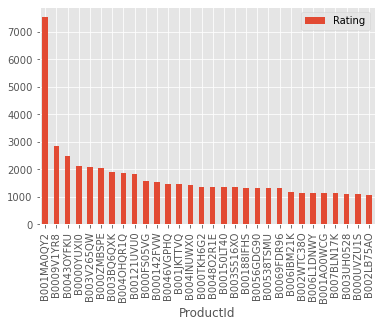

In [21]:
most_popular.head(30).plot(kind = "bar")

In [ ]:
#The above graph gives us the most popular products (arranged in descending order) sold by the business.

#For example, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc

In [ ]:
#Recommendation System - B
# Model-based collaborative filtering system
#Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

In [ ]:
#Utility Matrix based on products sold and user reviews

In [22]:
amazon_ratings1 = amazon_ratings.head(10000)

In [23]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
ratings_utility_matrix .shape

(9697, 886)

In [25]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X.shape

(886, 9697)

In [27]:
X1 = X

In [ ]:
#Decomposing the Matrix

In [28]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
#Correlation Matrix

In [29]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
#Isolating Product ID # 6117036094 from the Correlation Matrix

In [ ]:
#Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [30]:
X.index[99]

'6117036094'

In [31]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [32]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
# Recommending top 10 highly correlated products in sequence

In [33]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0205616461',
 '0558925278',
 '0733001998',
 '0737104473',
 '1304139220',
 '130414089X',
 '130414674X',
 '1304174778',
 '1304196046']

In [ ]:
#Recommendation System- C

In [ ]:
#For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [35]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
#Item to item based recommendation system based on product description
#Applicable when business is setting up its E-commerce website for the first time

In [36]:

product_descriptions = pd.read_csv('product_descriptions.csv')

In [37]:
product_descriptions.shape

(124428, 2)

In [38]:
product_descriptions.head(10)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [ ]:
#Checking for missing values

In [39]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [40]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [ ]:
#Feature extraction from product descriptions
#Converting the text in product description into numerical data for analysis

In [41]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [ ]:
# Visualizing product clusters in subset of data
# Fitting K-Means to the dataset

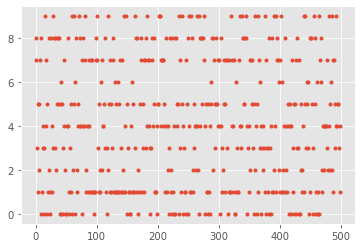

In [42]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
# Top words in each cluster based on product description

In [43]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 insulation
 shower
 kit
 fiberglass
 repair
 easy
 attic
 water
 pruner
 sq
Cluster 1:
 window
 bamboo
 rug
 shade
 shades
 mount
 natural
 ft
 wood
 center
Cluster 2:
 door
 storage
 metal
 wood
 adjustable
 doors
 easy
 unit
 lbs
 shelves
Cluster 3:
 power
 air
 volt
 light
 cooling
 tool
 led
 cutting
 amp
 battery
Cluster 4:
 wall
 fan
 plate
 home
 light
 speaker
 design
 panels
 speed
 storage
Cluster 5:
 toilet
 piece
 design
 use
 flush
 installation
 recommended
 bowl
 natural
 easy
Cluster 6:
 ft
 painted
 post
 base
 california
 moulding
 65
 proposition
 nbsp
 residents
Cluster 7:
 cycle
 oven
 cooking
 cu
 ft
 snow
 steam
 easy
 wash
 drying
Cluster 8:
 water
 metal
 easy
 handle
 heater
 steel
 use
 nickel
 stainless
 tank
Cluster 9:
 paint
 projects
 concrete
 brush
 used
 roller
 wood
 stake
 azek
 non


In [ ]:
# Predicting clusters based on key search words

In [44]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]


In [45]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


In [46]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[6]


In [ ]:
#In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

In [47]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[8]


In [ ]:
# Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.